In [206]:
import numpy as np
import pandas as pd

In [246]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [247]:
df.shape

(34546, 16)

In [248]:
df.columns

Index(['Id', 'bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'TARGET'],
      dtype='object')

In [249]:
features = df.columns[:-1]
target = df.columns[-1]

In [250]:
X = df[features]
y = df[target]

In [251]:
X.shape, y.shape

((34546, 15), (34546,))

In [252]:
df.info() # Данные без пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


In [253]:
y.value_counts()

low       23999
medium     7860
high       2687
Name: TARGET, dtype: int64

In [254]:
y = y.map({'low': 0, 'medium': 1, 'high': 2})


y

0        1
1        1
2        0
3        0
4        0
        ..
34541    0
34542    1
34543    0
34544    1
34545    1
Name: TARGET, Length: 34546, dtype: int64

In [255]:
def find_cat(data, num_uniq=4):
    for name in data.columns:
        s = ''
        s += name
        if (type(data[name][0]) == str):
            s += ' строка,'
            print(data[name].nunique())
            
        if (data[name].nunique()<=num_uniq):
            s += ' мало уникальных'
        if (s!=name):
            print (s)
            
find_cat(X)

6378
building_id строка,
34186
created строка,
27757
description строка,
6998
display_address строка,
8245
features строка,
3134
manager_id строка,
31992
photos строка,
12398
street_address строка,


In [256]:
from datetime import datetime

X['created'] = X['created'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
test['created'] = test['created'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

<ipython-input-256-3abc69659a11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['created'] = X['created'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))


In [257]:
for name in X.columns:
        if (type(X[name][0]) == str):                
            X[name] = LabelEncoder().fit_transform(X[name])
            test[name] = LabelEncoder().fit_transform(test[name])
            

<ipython-input-257-9eaba205188d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[name] = LabelEncoder().fit_transform(X[name])


In [258]:
X['year'] = X['created'].apply(lambda x: x.year)
X['month'] = X['created'].apply(lambda x: x.month)
X['day'] = X['created'].apply(lambda x: x.day)
X['hour'] = X['created'].apply(lambda x: x.hour)
X['minute'] = X['created'].apply(lambda x: x.minute)
X['seconds'] = X['created'].apply(lambda x: x.second)

In [259]:
test['year'] = test['created'].apply(lambda x: x.year)
test['month'] = test['created'].apply(lambda x: x.month)
test['day'] = test['created'].apply(lambda x: x.day)
test['hour'] = test['created'].apply(lambda x: x.hour)
test['minute'] = test['created'].apply(lambda x: x.minute)
test['seconds'] = test['created'].apply(lambda x: x.second)

In [260]:
test.drop('created', axis=1, inplace=True)
X.drop('created', axis=1, inplace=True)

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC

from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [139]:
X_train.shape, y_train.shape

((31091, 23), (31091,))

In [140]:
clf = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=15, random_state=42))
print(clf.fit(X_train, y_train))


y_pred = clf.predict(X_test)
print(f'Decision tree accuracy={balanced_accuracy_score(y_test, y_pred)}')

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, random_state=42))])
Decision tree accuracy=0.4610361938971976


In [ ]:
params = {'n_estimators': [100, 150, 200, 250],
          'criterion': ['gini', 'entrophy'], 
          'max_depth': [10, 15, 20], 
          'max_features': ['auto', 'sqrt', 'log2'],
          'class_weight': ['balanced', 'balanced_subsample']}

tree = RandomForestClassifier(random_state=42)
clf = GridSearchCV(estimator=tree, param_grid=params, scoring='balanced_accuracy', n_jobs=-1)
clf.fit(X_train, y_train)

In [107]:
clf.best_estimator_, clf.best_score_


(RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                        n_estimators=200, random_state=42),
 0.5619256548802029)

In [223]:
original_data = pd.read_csv('test.csv')

In [224]:
original_data['building_id'][1]

'850c3d4412aebb3335273ed95f3e4bd4'

,Id,TARGET
0,19477,low
1,29937,low
2,109148,low
3,65728,medium
4,33623,high
...,...,...
14801,8577,NaN
14802,91314,NaN
14803,38696,NaN
14804,64331,NaN


In [268]:
test['bath*bed'] = test['bathrooms'] * test['bedrooms']
test['building_id*display'] = test['building_id'] * test['display_address']
test['building_id*hour'] = test['building_id'] * test['hour']
test['display*hour'] = test['display_address'] * test['hour']


In [262]:
X['bath*bed'] = X['bathrooms'] * X['bedrooms']

In [263]:
X['building_id*display'] = X['building_id'] * X['display_address']

In [264]:
X['building_id*hour'] = X['building_id'] * X['hour']

In [265]:
X['display*hour'] = X['display_address'] * X['hour']

In [135]:
X['hour^2'] = X['hour'] * X['hour']

In [156]:
X.drop(['display*hour'], axis=1, inplace=True)

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [194]:
parameters = {'depth': [4, 5, 6, 7, 8, 9, 10],
              'learning_rate': [0.01, 0.02, 0.03, 0.04],
              }

In [205]:
clf = CatBoostClassifier(learning_rate=0.01, depth=15, random_seed=42).fit(X_train, y_train)

0:	learn: 1.0933918	total: 5.65s	remaining: 1h 34m 3s
1:	learn: 1.0871465	total: 10.1s	remaining: 1h 23m 47s
2:	learn: 1.0812346	total: 14.4s	remaining: 1h 19m 46s
3:	learn: 1.0752440	total: 18.9s	remaining: 1h 18m 38s
4:	learn: 1.0706319	total: 23.4s	remaining: 1h 17m 35s
5:	learn: 1.0644079	total: 27.8s	remaining: 1h 16m 41s
6:	learn: 1.0583524	total: 32.3s	remaining: 1h 16m 17s
7:	learn: 1.0523153	total: 36.8s	remaining: 1h 16m 9s
8:	learn: 1.0472624	total: 41.3s	remaining: 1h 15m 44s
9:	learn: 1.0423693	total: 45.7s	remaining: 1h 15m 27s
10:	learn: 1.0377485	total: 50.4s	remaining: 1h 15m 35s
11:	learn: 1.0342257	total: 54.9s	remaining: 1h 15m 21s
12:	learn: 1.0297218	total: 59.3s	remaining: 1h 15m 4s
13:	learn: 1.0257903	total: 1m 3s	remaining: 1h 14m 51s
14:	learn: 1.0203287	total: 1m 8s	remaining: 1h 14m 35s
15:	learn: 1.0166420	total: 1m 12s	remaining: 1h 14m 24s
16:	learn: 1.0120189	total: 1m 16s	remaining: 1h 14m 11s
17:	learn: 1.0076693	total: 1m 21s	remaining: 1h 13m 58s
18

KeyboardInterrupt: 

In [ ]:
y_pred = clf.predict(X_test)

print(balanced_accuracy_score(y_test, y_pred))

0.43607014327420385


In [267]:
clf = make_pipeline(MinMaxScaler(), RandomForestClassifier(class_weight='balanced_subsample', max_depth=10, n_estimators=200, random_state=42))
print(clf.fit(X_train, y_train))


y_pred = clf.predict(X_test)
print(f'RandomForestClassifier={balanced_accuracy_score(y_test, y_pred)}')

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=10, n_estimators=200,
                                        random_state=42))])
RandomForestClassifier=0.5756010558736802


0            0
1         7246
2         2418
3        25760
4        38046
         ...  
34541     1008
34542    11628
34543        0
34544     6700
34545    11985
Name: building_id*hour, Length: 34546, dtype: int64

In [145]:
X.drop('Id', axis=1, inplace=True)

<AxesSubplot:>

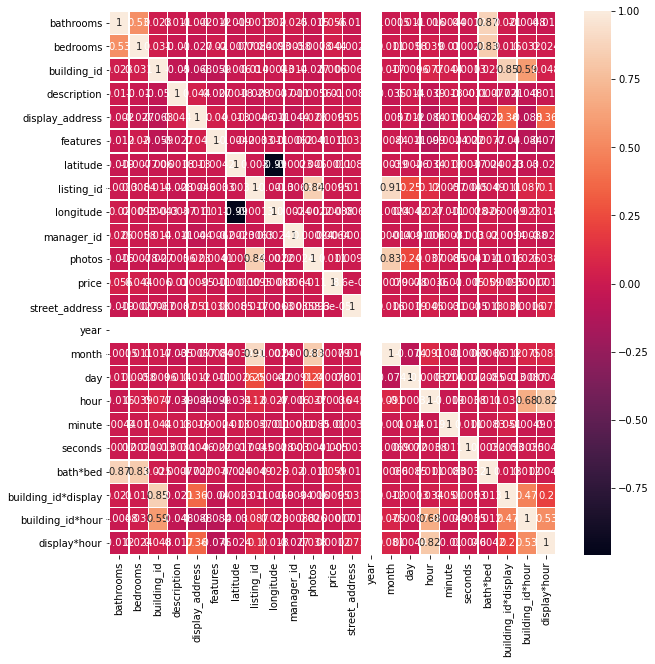

In [154]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(X.corr(), annot=True, linewidths=.5, ax=ax)

In [155]:
X.corrwith(y)

bathrooms             -0.086830
bedrooms               0.026370
building_id            0.118064
description           -0.013222
display_address       -0.108344
features              -0.033556
latitude               0.003763
listing_id            -0.030218
longitude             -0.004673
manager_id            -0.002111
photos                -0.075692
price                 -0.021754
street_address         0.022167
year                        NaN
month                 -0.009254
day                   -0.035906
hour                   0.166273
minute                 0.014896
seconds                0.000125
bath*bed              -0.037666
building_id*display    0.053992
building_id*hour       0.157976
display*hour           0.090025
dtype: float64

In [238]:
make_submit(y_pred)

In [273]:
test_sub = pd.read_csv('submission.csv')

In [274]:
test_sub

,Id,TARGET
0,19477,low
1,29937,medium
2,109148,high
3,65728,medium
4,33623,medium
...,...,...
14801,8577,low
14802,91314,high
14803,38696,high
14804,64331,low


In [275]:
result

array([0, 1, 2, ..., 2, 0, 1], dtype=int64)

In [269]:
result = clf.predict(test)

In [272]:
make_submit(result)

In [237]:
def make_submit(data):
    data = pd.Series(data).map({0: 'low', 1: 'medium', 2: 'high'})
    submit = pd.DataFrame({'Id': test.Id, 'TARGET': data})
    submit.to_csv('submission.csv', index=False)